# *Problem Statement*
-   Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k     mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import Dataset
wine=pd.read_csv("wine (1).csv")
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# *EDA*

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.shape

(178, 14)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [7]:
wine["Type"].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [8]:
# First we have to Check How much Accuracy it will give us Before Dimentionality Reduction Technique(PCA/t-SNE)
# Perform PCA
# Check Accuracy Score After PCA [ PCA perform good: when Accuracy Remain as it is or increase the accuracy]

In [9]:
#Splitting the data into Dependent and Independent Variable
x=wine.iloc[:,1:]
y=wine["Type"]
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
# Model Training and Testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [11]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



In [12]:
wine1=wine.drop(["Type"],axis=1)
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [13]:
wine1.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


# PCA 

In [14]:
# Feature Scaling
sc = StandardScaler()
wine2 = sc.fit_transform(wine1)
wine2
wine2=pd.DataFrame(wine2,columns=wine1.columns)
wine2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [15]:
# PCA
pca = PCA()
pcs = pca.fit_transform(wine2)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [16]:
# Cummulative variance of each PCA
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

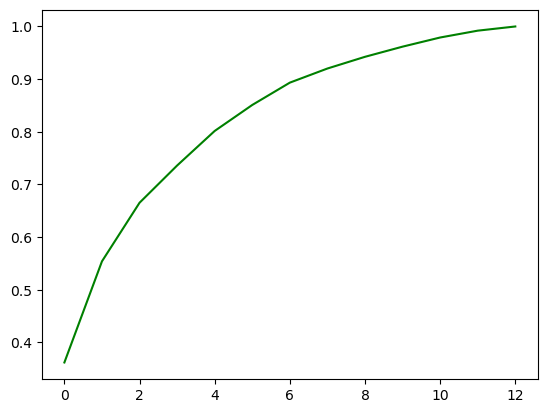

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_),color="green")

In [18]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(wine2)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [19]:
wine_new = pd.concat([pd.DataFrame(pcs,columns=['PC1','PC2','PC3']), wine['Type']], axis = 1)
wine_new

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<AxesSubplot:>

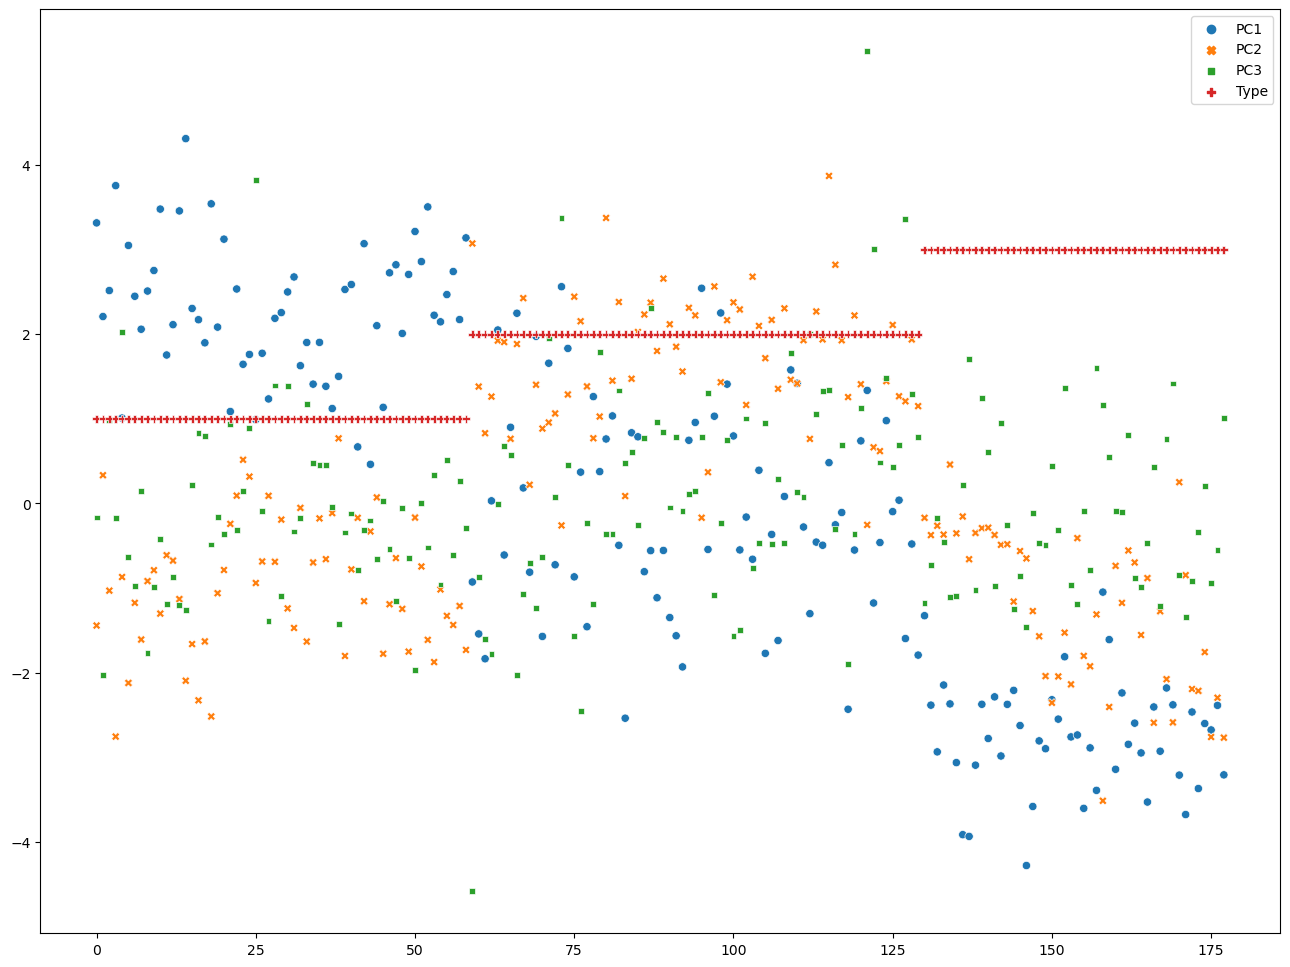

In [20]:
#Visualization of PCA
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data = wine_new)

In [21]:
#checking Accuracy Score after PCA 

In [22]:
x=wine_new.iloc[:,:-1]
y=wine_new["Type"]

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [25]:
# Accuracy Before PCA :94%
# Accuracy After PCA :97%
# Conclusion : PCA perform Good

# Checking With Other Cluster Algorithm

# 1] Hierarchical Clustering

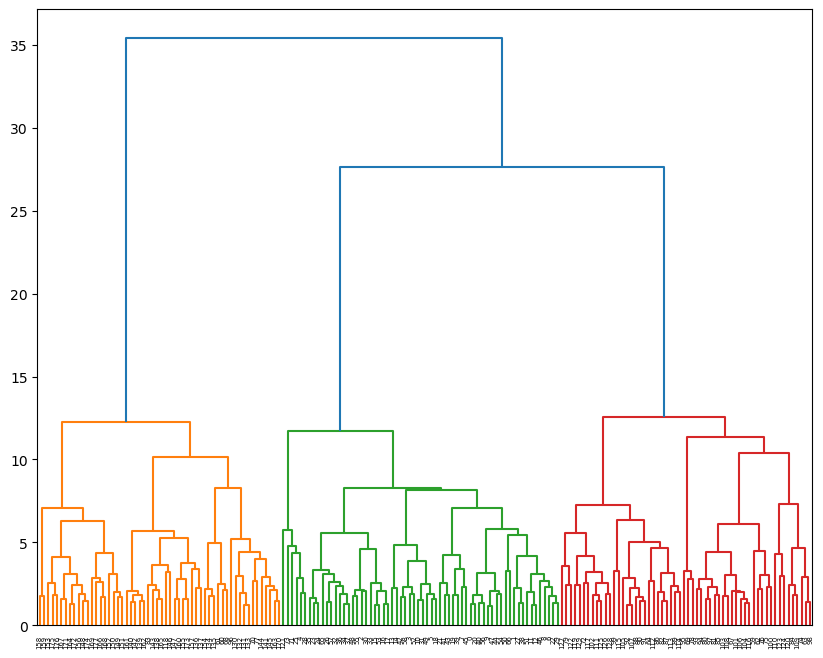

In [26]:
# As we already have standardised data, create Dendrograms
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine2,'ward'))

In [27]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")

In [28]:
y=pd.DataFrame(hclusters.fit_predict(wine2),columns=['clustersid'])

In [29]:
y["clustersid"].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [30]:
#Adding Clusterid to dataset
wine["clusterid"]=hclusters.labels_
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# 2] K-Means Clustering

In [31]:
# As we already have Standardised data
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS

In [32]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,10):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine2)
    wcss.append(kmeans.inertia_)

In [33]:
sns.set_style('darkgrid')

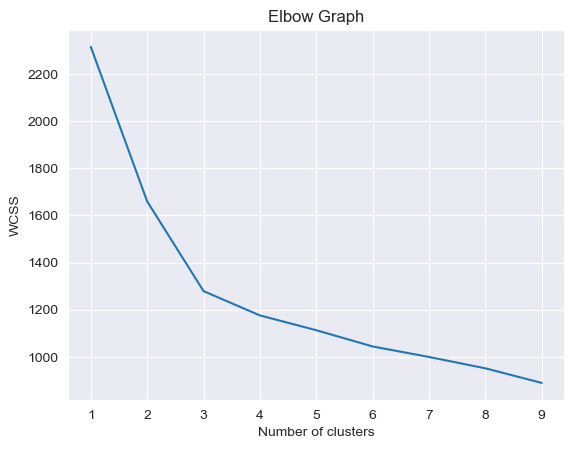

In [34]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,10),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build Cluster algorithm using K=3

In [35]:
Kcluster=KMeans(3,random_state=0).fit(wine2)
Kcluster

KMeans(n_clusters=3, random_state=0)

In [36]:
Kcluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [37]:
y["clustersid"].value_counts()

2    64
0    58
1    56
Name: clustersid, dtype: int64

In [38]:
#Adding Clusterid to dataset
wine["clusterid"]=Kcluster.labels_
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0
